In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# !pip install pandas

In [47]:
dados = pd.read_excel('../data/SPDadosCriminais_2024.xlsx')
# dados_2023 = pd.concat([pd.read_excel('../data/SPDadosCriminais_2023.xlsx', sheet_name='JAN_JUN_2023'), pd.read_excel('../data/SPDadosCriminais_2023.xlsx', sheet_name='JUL_DEZ_2023')])
len(dados)

296176

In [ ]:
print(len(dados))
# Remover as linhas onde a cidade é "RIO DE JANEIRO"
dados = dados[dados["CIDADE"] != "RIO DE JANEIRO"]

dados.head(3)

# Entendimento dos Dados

In [ ]:
# Descrição das Variáveis
print("Descrição das Variáveis:")
print(dados.columns)

# Tipos de Dados
print("\nTipos de Dados:")
print(dados.dtypes)

In [ ]:
# Contagem de valores únicos em colunas categóricas
print(dados['CIDADE'].value_counts())

## Valores ausentes

In [ ]:
# Valores Ausentes
print("\nValores Ausentes por Coluna:")
print(dados.isnull().sum())

# Distribuição de Valores Ausentes
print("\nDistribuição de Valores Ausentes (Percentual):")
missing_percentage = (dados.isnull().sum() / len(dados)) * 100
print(missing_percentage)


# Visualização da Distribuição de Valores Ausentes
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.title('Percentual de Valores Ausentes por Coluna')
plt.ylabel('Percentual')
plt.xlabel('Colunas')
plt.show()

## Analises iniciais


### Local com maior ocorrencia

In [ ]:
dados['DESCR_TIPOLOCAL'].value_counts()

In [52]:
# Contagem de ocorrências por tipo de local
tipo_local_counts = dados['DESCR_TIPOLOCAL'].value_counts()

# Filtrar para obter os top 20 tipos de locais com mais ocorrências
top_20_locais = tipo_local_counts.head(15)

print(top_20_locais)
top_20_locais_df = top_20_locais.reset_index()
top_20_locais_df.columns = ['DESCR_TIPOLOCAL', 'Contagem']

# plt.figure(figsize=(12, 8))
# sns.barplot(x='Contagem', y='DESCR_TIPOLOCAL', data=top_20_locais_df, order=top_20_locais_df['DESCR_TIPOLOCAL'])
# plt.title('Contagem de Ocorrências por Tipo de Local')
# plt.xlabel('Contagem')
# plt.ylabel('Tipo de Local')
# plt.show()


DESCR_TIPOLOCAL
Via Pública                                198628
Residência                                  22801
Casa                                        12540
Terminal/Estação                             6447
Comércio e Serviços                          4246
Metroviário e Ferroviário Metropolitano      2652
Estacionamento/Garagem                       2205
Condomínio Residencial                       2055
Unidade Rural                                1809
Area não Ocupada                             1630
Estabelecimento de Ensino                    1581
Restaurante e Afins                          1543
Saúde                                        1096
Rodovia/Estrada                              1067
Centro Comercial/Empresarial                 1062
Name: count, dtype: int64


/tmp/ipykernel_16460/4150697433.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




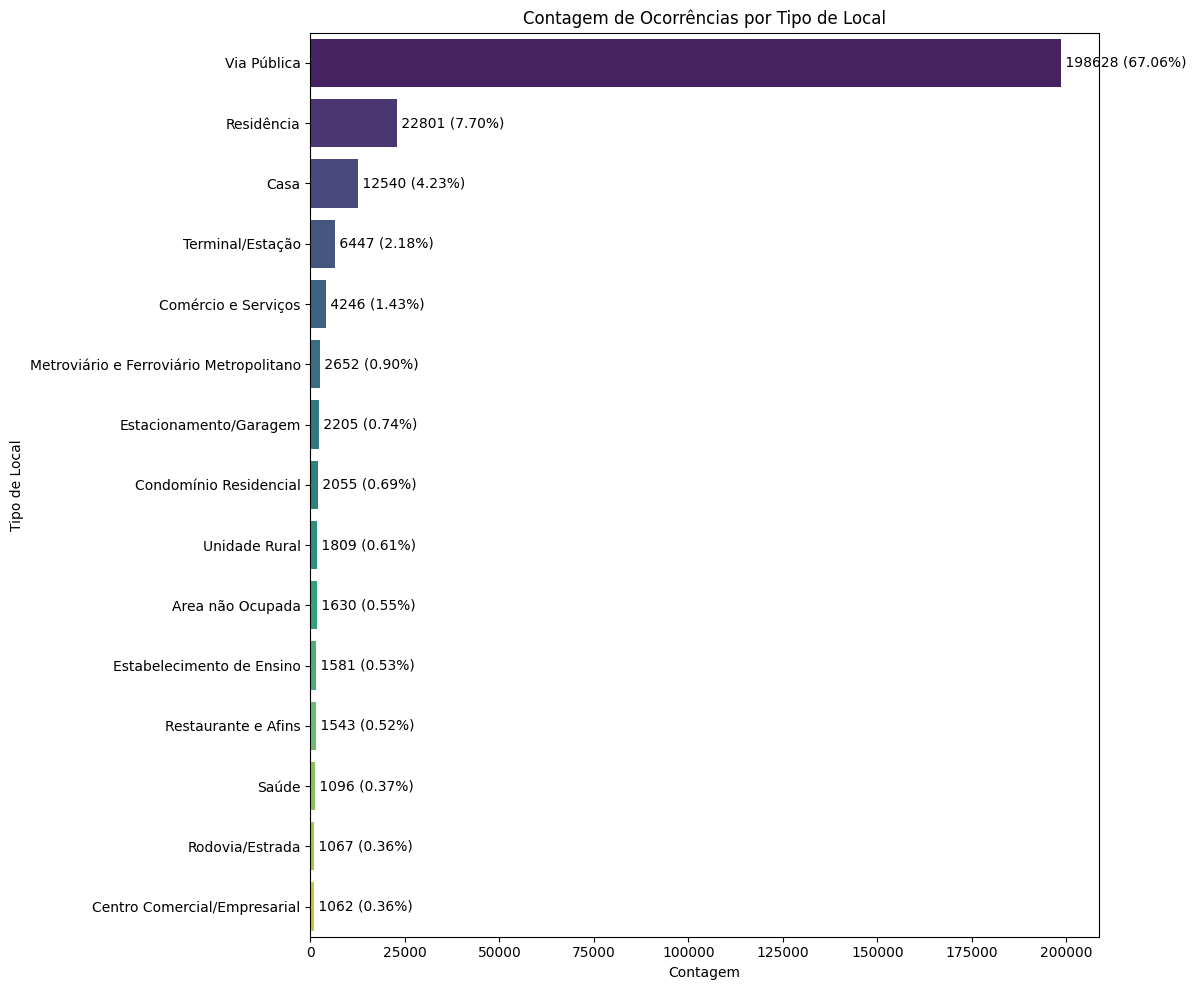

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem de ocorrências por tipo de local
tipo_local_counts = dados['DESCR_TIPOLOCAL'].value_counts()

# Filtrar para obter os top 20 tipos de locais com mais ocorrências
top_20_locais = tipo_local_counts.head(15)

# Reformatar os dados para um DataFrame
top_20_locais_df = top_20_locais.reset_index()
top_20_locais_df.columns = ['DESCR_TIPOLOCAL', 'Contagem']

# Plotando o gráfico
plt.figure(figsize=(12, 10))

# Barplot principal
sns.barplot(x='Contagem', y='DESCR_TIPOLOCAL', data=top_20_locais_df, palette='viridis')

# Adicionando informações de proporção dentro das barras
for index, value in enumerate(top_20_locais):
    plt.text(value, index, f' {value} ({value / len(dados) * 100:.2f}%)', ha='left', va='center', color='black')

# Configurações do gráfico
plt.title('Contagem de Ocorrências por Tipo de Local')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Local')

# Ajustando o layout
plt.tight_layout()
plt.show()


### Coordenadas paralelas

In [82]:
import plotly.express as px

dados_filter = dados.copy()

# locais = ['Via Pública','Residência','Terminal/Estação','Metroviário e Ferroviário Metropolitano', 'Comércio e Serviços ','Estacionamento/Garagem']

# dados_filter[dados_filter['DESCR_TIPOLOCAL']=='Casa']['DESCR_TIPOLOCAL'] = 'Residência' 
# dados_filter = dados_filter[dados_filter['DESCR_TIPOLOCAL'].isin(locais)]
# print(dados_filter['DESCR_TIPOLOCAL'].value_counts())

dados_filter['BAIRRO']


0                                    SÉ
1                                    SE
2                                    SE
3         CENTRO HISTÓRICO DE SÃO PAULO
4                                    SE
                      ...              
296171            JARDIM MARIA DA COSTA
296172            JARDIM MARIA DA COSTA
296173                     JARDIM SUINA
296174                    JARDIM RECORD
296175                     J FREITAS JR
Name: BAIRRO, Length: 296176, dtype: object

In [85]:
# Madrugada: 0h - 5h
# Manhã: 6h - 11h
# Tarde: 12h - 17h
# Noite: 18h - 23h

dados_filter = dados_filter.dropna(subset=['HORA_OCORRENCIA_BO'])

dados_filter['HORA_OCORRENCIA_BO'] = pd.to_datetime(dados_filter['HORA_OCORRENCIA_BO'], format='%H:%M:%S').dt.hour

def categorizar_periodo(hora):
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noite'

# Aplicar a função de categorização
dados_filter['PERIODO_DO_DIA'] = dados_filter['HORA_OCORRENCIA_BO'].apply(categorizar_periodo)

# Contar o número de ocorrências em cada período do dia
periodo_counts = dados_filter['PERIODO_DO_DIA'].value_counts().sort_index()

print(periodo_counts)

PERIODO_DO_DIA
Madrugada    35138
Manhã        49065
Noite        65267
Tarde        57690
Name: count, dtype: int64


In [107]:
dados_filter['NATUREZA_APURADA'].value_counts()

def categorizar_ocorrencia(natureza):
    if 'FURTO' in natureza:
        return 'Furtos'
    elif 'ROUBO' in natureza:
        return 'Roubos'
    elif 'LESÃO CORPORAL' in natureza:
        return 'Lesões'
    elif 'ENTORPECENTES' in natureza:
        return 'Tráfico e Porte de Entorpecentes'
    elif 'HOMICÍDIO' in natureza or 'LATROCÍNIO' in natureza:
        return 'Homicídios'
    elif 'ESTUPRO' in natureza:
        return 'Outros'
    elif 'TENTATIVA DE HOMICÍDIO' in natureza or 'EXTORSÃO MEDIANTE SEQUESTRO' in natureza:
        return 'Sequestro/Tentativa Homicídio'
    else:
        return 'Outros'

# Aplicar a função de categorização
dados_filter['CATEGORIA'] = dados_filter['NATUREZA_APURADA'].apply(categorizar_ocorrencia)

# Remover linhas onde a coluna 'CATEGORIA' é igual a 'Outros'
dados_filter = dados_filter[dados_filter['CATEGORIA'] != 'Outros']
# Contar o número de ocorrências em cada categoria
# categoria_counts = dados_filter.groupby('CATEGORIA')['count'].sum().sort_values(ascending=False)

print(dados_filter['CATEGORIA'].value_counts)


<bound method IndexOpsMixin.value_counts of 1                                   Furtos
2                                   Furtos
4                                   Furtos
5                                   Furtos
6                                   Furtos
                        ...               
296171    Tráfico e Porte de Entorpecentes
296172    Tráfico e Porte de Entorpecentes
296173    Tráfico e Porte de Entorpecentes
296174    Tráfico e Porte de Entorpecentes
296175    Tráfico e Porte de Entorpecentes
Name: CATEGORIA, Length: 204345, dtype: object>


In [108]:
dados_filter['Indice Ocorrencia'] = range(len(dados_filter))
dados_filter_rp = dados_filter[dados_filter['CIDADE']=='RIBEIRAO PRETO']
dados_filter_rp

nulos_tipo_local = dados_filter_rp['BAIRRO'].isnull().sum()
nulos_periodo_dia = dados_filter_rp['PERIODO_DO_DIA'].isnull().sum()
nulos_categoria = dados_filter_rp['CATEGORIA'].isnull().sum()

# Exibir o número de valores nulos em cada coluna
print(f'Valores nulos em BAIRRO: {nulos_tipo_local}')
print(f'Valores nulos em PERIODO_DO_DIA: {nulos_periodo_dia}')
print(f'Valores nulos em CATEGORIA: {nulos_categoria}')

dados_filter_rp = dados_filter_rp.dropna(subset=['BAIRRO', 'PERIODO_DO_DIA', 'CATEGORIA'])

# Identificar os bairros com mais ocorrências
bairros_mais_ocorrencias = dados_filter_rp['BAIRRO'].value_counts().nlargest(5).index
bairros_mais_ocorrencias
dados_filter_rp = dados_filter_rp[dados_filter_rp['BAIRRO'].isin(bairros_mais_ocorrencias)]
dados_filter_rp['BAIRRO'].value_counts()

Valores nulos em BAIRRO: 16
Valores nulos em PERIODO_DO_DIA: 0
Valores nulos em CATEGORIA: 0


BAIRRO
CENTRO            252
CAMPOS ELISEOS    191
IPIRANGA          107
VILA VIRGINIA     106
VILA TIBÉRIO      104
Name: count, dtype: int64

In [110]:
# Mapear categorias para cores utilizando a paleta de cores do Seaborn
palette = sns.color_palette("tab10", len(dados_filter_rp['CATEGORIA'].unique()))
cor_por_categoria = dict(zip(dados_filter_rp['CATEGORIA'].unique(), palette))
cor_por_categoria_rgb = {cat: f'rgb({int(cor[0]*255)},{int(cor[1]*255)},{int(cor[2]*255)})' for cat, cor in cor_por_categoria.items()}

# Adicionar uma coluna de cores ao DataFrame com base na categoria
dados_filter_rp['COR'] = dados_filter_rp['CATEGORIA'].map(cor_por_categoria_rgb)

# Criar o gráfico de coordenadas paralelas
fig = px.parallel_categories(dados_filter_rp, dimensions=['BAIRRO', 'PERIODO_DO_DIA', 'CATEGORIA'],
                             color='COR', labels={'BAIRRO': 'Bairro', 'PERIODO_DO_DIA': 'Período do Dia', 'CATEGORIA': 'Categoria'})

# Adicionar título
fig.update_layout(title='Distribuição de Crimes por Categoria e Período do Dia nos Bairros com mais Ocorrências')

# Mostrar o gráfico
fig.write_html("parallel_categories_rp.html")

In [98]:
# dados_filter_rp = dados_filter_rp.dropna(subset=['DESCR_TIPOLOCAL', 'PERIODO_DO_DIA', 'CATEGORIA'])

# Mapear categorias para cores específicas
cor_por_categoria = {
    'Furtos': 'blue',
    'Roubos': 'orange',
    'Lesões': 'green',
    'Tráfico e Porte de Entorpecentes': 'red',
    'Homicídios': 'purple',
    'Estupros': 'yellow',
    'Outros Crimes Violentos': 'brown',
    'Outros': 'gray'
}

# Adicionar uma coluna de cores ao DataFrame com base na categoria
dados_filter_rp['COR'] = dados_filter_rp['CATEGORIA'].map(cor_por_categoria)

# Criar o gráfico de coordenadas paralelas
fig = px.parallel_categories(dados_filter_rp, dimensions=['BAIRRO', 'PERIODO_DO_DIA', 'CATEGORIA'],
                             color='COR')

# Adicionar título
fig.update_layout(title='Gráfico de Coordenadas Paralelas para Crimes')


# Mostrar o gráfico
fig.write_html("parallel_categories_rp.html")


In [ ]:
# dados_mini['Indice Ocorrencia'] = range(len(dados_mini))

# # Gráfico de coordenadas paralelas
# fig = px.parallel_categories(dados_mini[['DESCR_TIPOLOCAL', 'DESC_PERIODO', 'NATUREZA_APURADA', 'Indice Ocorrencia']], 
#                               color="Indice Ocorrencia",
#                               color_continuous_scale=px.colors.sequential.Viridis,
#                               labels={"DESCR_TIPOLOCAL": "Tipo Local", 
#                                       "DESC_PERIODO": "Horário do Dia", 
#                                       "NATUREZA_APURADA": "Crime Associado"},
#                               title="Coordenadas Paralelas: Tipo Local, Horário do Dia e Crime Associado")

# # fig.show()
# fig.write_html("parallel_categories.html")

### Verificar periodo do dia com mais crimes / horario do dia 

In [ ]:
# dados_hora = dados.dropna(subset=['HORA_OCORRENCIA_BO'])

# dados_hora['HORA_OCORRENCIA_BO'] = pd.to_datetime(dados_hora['HORA_OCORRENCIA_BO'], format='%H:%M:%S').dt.hour

# # Criar o histograma com bins de horas cheias
# plt.figure(figsize=(12, 6))
# sns.histplot(dados_hora['HORA_OCORRENCIA_BO'], bins=range(25), kde=False, color='blue', edgecolor='black')


# plt.xlabel('Hora do Dia', fontsize=14)
# plt.ylabel('Número de Ocorrências', fontsize=14)
# plt.title('Distribuição de Crimes por Hora do Dia', fontsize=10)
# plt.xticks(range(24), [f'{i}' for i in range(24)], fontsize=9)
# plt.yticks(fontsize=10)
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# plt.show()

In [28]:
# dados_hora['HORA_OCORRENCIA_BO'] = pd.to_datetime(dados_hora['HORA_OCORRENCIA_BO'], format='%H:%M:%S').dt.hour
dados_hora['HORA_OCORRENCIA_BO']

hour_counts = dados_hora['HORA_OCORRENCIA_BO'].value_counts().sort_index()

labels = hour_counts.index
values = hour_counts.values
print(values)
values.sum()

[ 6468  5713  5844  5722  5693  5698  6548  7486  7578  7988  9829  9636
  9872  8733  9434  9849  9722 10080 10358 11678 12341 11003 10434  9453]


207160

/tmp/ipykernel_16460/2900602813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_hora['HORA_OCORRENCIA_BO'] = pd.to_datetime(dados_hora['HORA_OCORRENCIA_BO'], format='%H:%M:%S').dt.hour


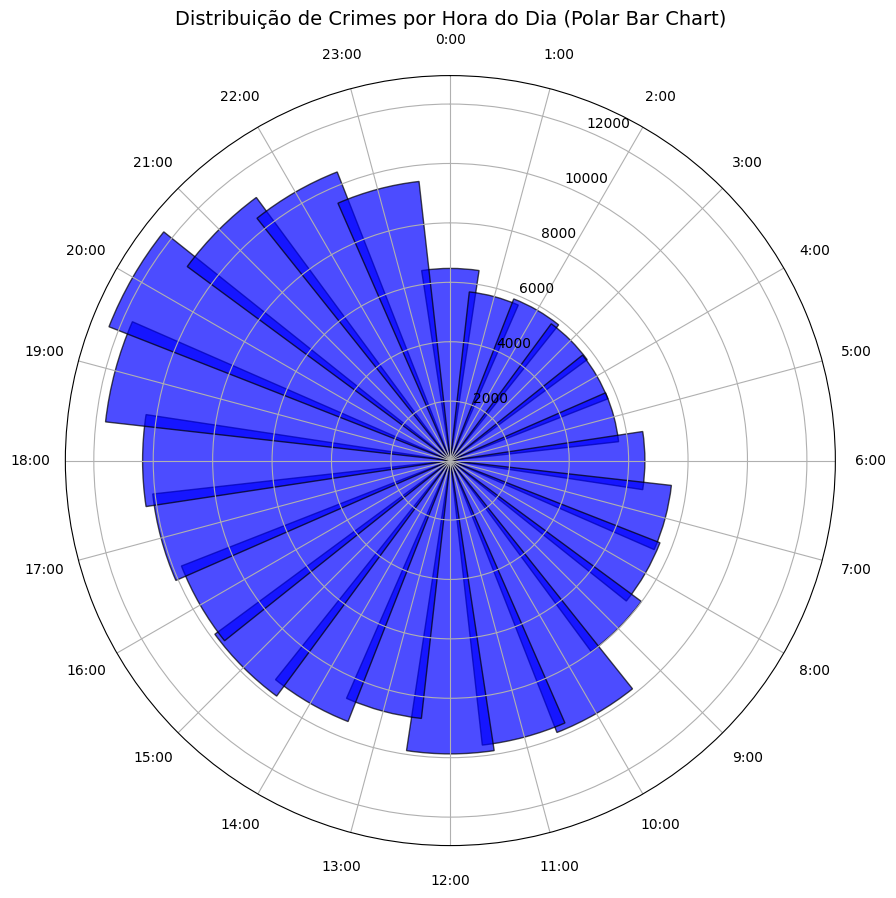

In [11]:
dados_hora = dados.dropna(subset=['HORA_OCORRENCIA_BO'])

# Converter a coluna 'HORA_OCORRENCIA_BO' para o formato de hora
dados_hora['HORA_OCORRENCIA_BO'] = pd.to_datetime(dados_hora['HORA_OCORRENCIA_BO'], format='%H:%M:%S').dt.hour

# Agrupar os dados por hora e contar o número de ocorrências
hour_counts = dados_hora['HORA_OCORRENCIA_BO'].value_counts().sort_index()

# Preparar os dados para o gráfico de barras polar
labels = hour_counts.index
values = hour_counts.values

# Criação do gráfico de barras polar
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Criação do ângulo para cada barra no sentido horário
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Adicionar valores iniciais ao final para fechamento do gráfico
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

# Plot das barras
bars = ax.bar(angles[:-1], values[:-1], width=0.3, color='blue', edgecolor='black', alpha=0.7)

# Ajuste dos rótulos para seguir a ordem do relógio
ax.set_xticks(angles[:-1])
ax.set_xticklabels([f'{int(label)}:00' for label in labels])

# Rotacionar os labels para ficarem mais legíveis
ax.tick_params(axis='x', which='major', pad=15)

# Ajustar a posição do zero para o topo do gráfico e rotação para sentido horário
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Adicionar título
plt.title('Distribuição de Crimes por Hora do Dia (Polar Bar Chart)', fontsize=14)

# Mostrar o gráfico
plt.show()


### Analise de correlação

In [ ]:
# Converter colunas de data para datetime
dados['DATA_COMUNICACAO'] = pd.to_datetime(dados['DATA_COMUNICACAO'])
dados['DATA_OCORRENCIA_BO'] = pd.to_datetime(dados['DATA_OCORRENCIA_BO'])

# Extrair partes da data para análise
dados['ANO_COMUNICACAO'] = dados['DATA_COMUNICACAO'].dt.year
dados['MES_COMUNICACAO'] = dados['DATA_COMUNICACAO'].dt.month
dados['DIA_COMUNICACAO'] = dados['DATA_COMUNICACAO'].dt.day
dados['ANO_OCORRENCIA'] = dados['DATA_OCORRENCIA_BO'].dt.year
dados['MES_OCORRENCIA'] = dados['DATA_OCORRENCIA_BO'].dt.month
dados['DIA_OCORRENCIA'] = dados['DATA_OCORRENCIA_BO'].dt.day

# Selecionar as colunas relevantes para correlação
colunas_para_correlacao = [ 
                           'LATITUDE', 'LONGITUDE', 'MES_ESTATISTICA', 
                           'MES_COMUNICACAO', 'DIA_COMUNICACAO', 'MES_OCORRENCIA', 'DIA_OCORRENCIA']

dados_numericos = dados[colunas_para_correlacao]
dados_numericos
# Calcular a matriz de correlação entre variáveis numéricas
correlation_matrix = dados_numericos.corr()

# # Plotar o heatmap da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


### Mapa de calor com crimes

In [ ]:
import folium
from folium.plugins import HeatMap

# Centro do mapa no estado de São Paulo (latitude e longitude aproximadas)
map_center = [-23.5505, -46.6333]

# Criar um mapa base
mapa = folium.Map(location=map_center, zoom_start=7)

# Adicionar os pontos de crimes como um mapa de calor
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in dados.iterrows() if not pd.isnull(row['LATITUDE']) and not pd.isnull(row['LONGITUDE'])]
HeatMap(heat_data).add_to(mapa)

# Salvar o mapa em um arquivo HTML
mapa.save('mapa_de_crimes.html')


adicionado os cluster

In [ ]:
import folium
from folium.plugins import HeatMap
import folium
from folium.plugins import HeatMap, MarkerCluster


# Centro do mapa no estado de São Paulo (latitude e longitude aproximadas)
map_center = [-23.5505, -46.6333]

# Criar um mapa base
mapa = folium.Map(location=map_center, zoom_start=7)

# Adicionar os pontos de crimes como um mapa de calor
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in dados.iterrows() if not pd.isnull(row['LATITUDE']) and not pd.isnull(row['LONGITUDE'])]
HeatMap(heat_data).add_to(mapa)

# Adicionar os pontos de crimes usando clusters
marker_cluster = MarkerCluster().add_to(mapa)
for index, row in dados.iterrows():
    if not pd.isnull(row['LATITUDE']) and not pd.isnull(row['LONGITUDE']):
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=f"Tipo de Local: {row['DESCR_TIPOLOCAL']}<br>Data: {row['DATA_OCORRENCIA_BO']}<br>Cidade: {row['CIDADE']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)

# Salvar o mapa em um arquivo HTML
mapa.save('cluster_mapa_de_crimes.html')

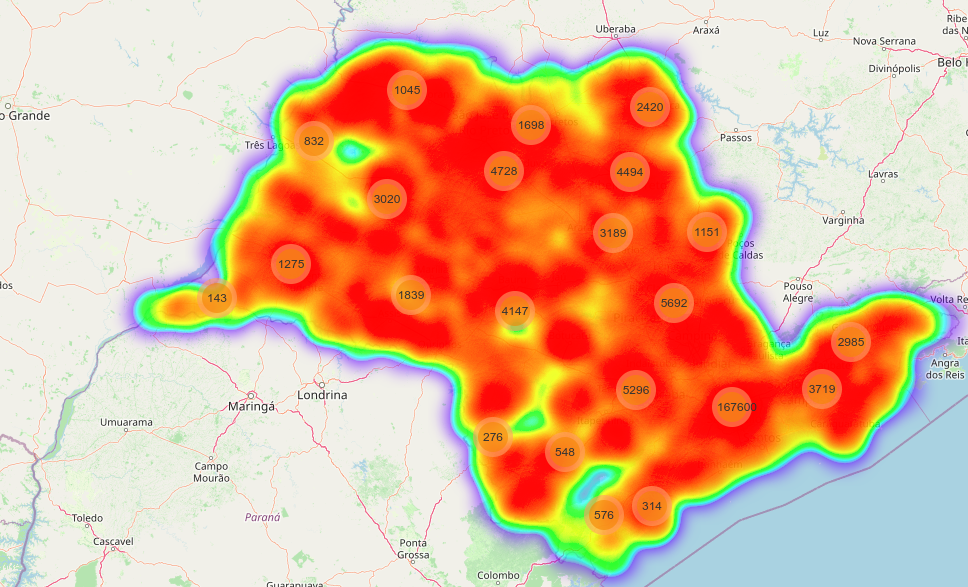

Apenas nas cidades escolhidas

In [ ]:

dados['CIDADE'].value_counts().head(60)

In [ ]:
import folium
from folium.plugins import HeatMap
import folium
from folium.plugins import HeatMap, MarkerCluster

crimes_sp = dados[dados['CIDADE']=='RIBEIRAO PRETO']
map_center = [-21.1775, -47.8103]

mapa = folium.Map(location=map_center, zoom_start=7)
# Adicionar os pontos de crimes como um mapa de calor
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in crimes_sp.iterrows() if not pd.isnull(row['LATITUDE']) and not pd.isnull(row['LONGITUDE'])]
HeatMap(heat_data).add_to(mapa)

# Adicionar os pontos de crimes usando clusters
marker_cluster = MarkerCluster().add_to(mapa)
for index, row in crimes_sp.iterrows():
    if not pd.isnull(row['LATITUDE']) and not pd.isnull(row['LONGITUDE']):
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=f"Tipo de Local: {row['DESCR_TIPOLOCAL']}<br>Data: {row['DATA_OCORRENCIA_BO']}<br>Cidade: {row['CIDADE']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)

# Salvar o mapa em um arquivo HTML
mapa.save('cluster_mapa_de_crimes_sc.html')

### Analise tempo ate o BO

Outra questão interessante é quanto tempo as pessoas esperam antes de denunciar o crime. Ao subtrair a data em que o crime ocorreu e foi denunciado, obtenho informações sobre o tempo de “atraso” e estratifico-os por crimes.

In [ ]:
dados['NATUREZA_APURADA']

In [ ]:
# Converter colunas de data para o formato datetime
dados['DATA_COMUNICACAO'] = pd.to_datetime(dados['DATA_COMUNICACAO'])
dados['DATA_OCORRENCIA_BO'] = pd.to_datetime(dados['DATA_OCORRENCIA_BO'])

# Calcular o tempo de atraso em dias
dados['TEMPO_ATRASO'] = (dados['DATA_COMUNICACAO'] - dados['DATA_OCORRENCIA_BO']).dt.days

dados = dados[dados['TEMPO_ATRASO'] >= 0]

# Filtrar crimes que aparecem pelo menos 10 vezes
crime_counts = dados['NATUREZA_APURADA'].value_counts()
crimes_filtrados = crime_counts[crime_counts >= 10].index
dados_filtrados = dados[dados['NATUREZA_APURADA'].isin(crimes_filtrados)]

# Exibir os primeiros registros para verificar
print(len(dados_filtrados))
print(dados_filtrados[['NATUREZA_APURADA', 'DATA_OCORRENCIA_BO', 'DATA_COMUNICACAO', 'TEMPO_ATRASO']].head())


In [ ]:

atraso_por_crime = dados_filtrados.groupby('NATUREZA_APURADA')['TEMPO_ATRASO'].describe()

print(len(atraso_por_crime))
# Exibir as estatísticas descritivas
print(atraso_por_crime.head(50))

plt.figure(figsize=(14, 8))
sns.boxplot(x='TEMPO_ATRASO', y='NATUREZA_APURADA', data=dados_filtrados, showfliers=False)
plt.title('Distribuição do Tempo de Atraso na Comunicação de Crimes por Tipo de Crime')
plt.xlabel('Tempo de Atraso (dias)')
plt.ylabel('Tipo de Crime')
plt.show()


In [ ]:
atraso_por_crime

crime_counts = dados['NATUREZA_APURADA'].value_counts()
crimes_filtrados = crime_counts[crime_counts >= 10].index
dados_filtrados = dados[dados['NATUREZA_APURADA'].isin(crimes_filtrados)]

# Criar os intervalos de tempo
intervalos = [-1, 0, 1, 2, 7, 30, 365, float('inf')]
labels = ['No mesmo dia', '1 dia de atraso', '2 dias', '3 a 7 dias', '8 a 30 dias', '30 dias a 1 ano', 'Mais de 1 ano']

# Adicionar uma nova coluna com a categoria de tempo de atraso
dados_filtrados['TEMPO_CATEGORIA'] = pd.cut(dados_filtrados['TEMPO_ATRASO'], bins=intervalos, labels=labels)

# Agrupar por crime e categoria de tempo de atraso
atraso_por_crime = dados_filtrados.groupby(['NATUREZA_APURADA', 'TEMPO_CATEGORIA']).size().unstack(fill_value=0)

atraso_por_crime

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que você já tenha os dados e tenha feito as operações necessárias para criar o dataframe 'atraso_por_crime'

# Configurar o estilo e tamanho do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Calcular o total de ocorrências para cada tipo de crime
atraso_por_crime['Total'] = atraso_por_crime[labels].sum(axis=1)

# Calcular a proporção em relação ao total para cada categoria de tempo de atraso
for categoria in labels:
    atraso_por_crime[categoria] = atraso_por_crime[categoria] / atraso_por_crime['Total']

# Definir uma paleta de cores diferente
cores = sns.color_palette("rocket", len(labels))

# Plotar o histograma empilhado
for i, categoria in enumerate(labels):
    print(atraso_por_crime.index)
    plt.barh(atraso_por_crime.index, atraso_por_crime[categoria], label=categoria, color=cores[i])

# Adicionar legenda
plt.legend()

# Adicionar título e rótulos nos eixos
plt.title('Proporção de ocorrências por categoria de tempo de atraso e crime')
plt.xlabel('Proporção de Ocorrências')
plt.ylabel('Tipo de Crime')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Lista de paletas de cores disponíveis no Seaborn
# paletas_seaborn = [
#     "deep", "muted", "bright", "pastel", "dark", "colorblind",
#     "rocket", "mako", "flare", "crest", "cubehelix", "icefire", "vlag", "viridis", "plasma", "inferno", "magma",
#     "twilight", "twilight_shifted", "hsv",
# ]

# # Testar diferentes paletas de cores
# for paleta in paletas_seaborn:
#     plt.figure(figsize=(10, 2))
#     sns.palplot(sns.color_palette(paleta))
#     plt.title(paleta)
#     plt.show()


## Estatísticas Descritivas

In [ ]:
# Distribuição temporal
print(dados['ANO_BO'].value_counts())
print(dados['MES_ESTATISTICA'].value_counts())
print(dados['HORA_OCORRENCIA_BO'].value_counts())
print(dados['DESC_PERIODO'].value_counts())

# Hipóteses - proximo notebook

<!-- ## O número de crimes tem aumentado ou diminuído ao longo dos anos/meses ? -->
<!-- 
vamos usar a data de comunicação (DATA_COMUNICACAO) por que se a gente usar a data bo vai ser inconsistente porque pode ter ocorrido um crime e a pessoa só denunciar 10 anos depois. -->

In [ ]:
# dados.groupby(['ANO_ESTATISTICA', 'MES_ESTATISTICA']).size().reset_index(name='counts')

# # dados['DATA_COMUNICACAO']

In [ ]:
# # Converter colunas de datas para datetime
# dados['DATA_COMUNICACAO'] = pd.to_datetime(dados['DATA_COMUNICACAO'], format='%Y-%m-%d')

# # Extrair ano e mês das datas
# dados['ano'] = dados['DATA_COMUNICACAO'].dt.year
# dados['mes'] = dados['DATA_COMUNICACAO'].dt.month

# dados_2023_2024 = dados[dados['ano'].isin([2023, 2024])]

# ocorrencias_por_mes = dados_2023_2024.groupby(['ano', 'mes']).size().reset_index(name='counts')

# plt.figure(figsize=(14, 8))
# sns.lineplot(data=ocorrencias_por_mes, x='mes', y='counts', hue='ano', palette='tab10')
# plt.xlabel('Mês')
# plt.ylabel('Número de Ocorrências')
# plt.title('Ocorrências por Mês em 2023 e 2024')
# plt.legend(title='Ano', loc='upper right')
# plt.grid(True)
# plt.show()

In [ ]:
# dados.groupby(['ano', 'mes']).size().reset_index(name='counts')